In [1]:
from sklearn import svm, metrics
from sklearn.model_selection import train_test_split,  GridSearchCV
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

CV_flag = False
DATAPATH = "data/digits.csv"
df = pd.read_csv(DATAPATH)
X = df.drop("label",axis=1).values
scaler = StandardScaler()
scaler.fit(X)
X_std = scaler.transform(X)
y = df["label"].values
labels = df["label"] 

C:\Users\usami\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 1.556s...
[t-SNE] Computed neighbors for 10000 samples in 163.187s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 5.095106
[t-SNE] Computed conditional probabilities in 0.595s
[t-SNE] Iteration 50: error = 97.1414871, gradient norm = 0.0072893 (50 iterations in 50.554s)
[t-SNE]

Text(0.5,0,'t-SNE feature 1')

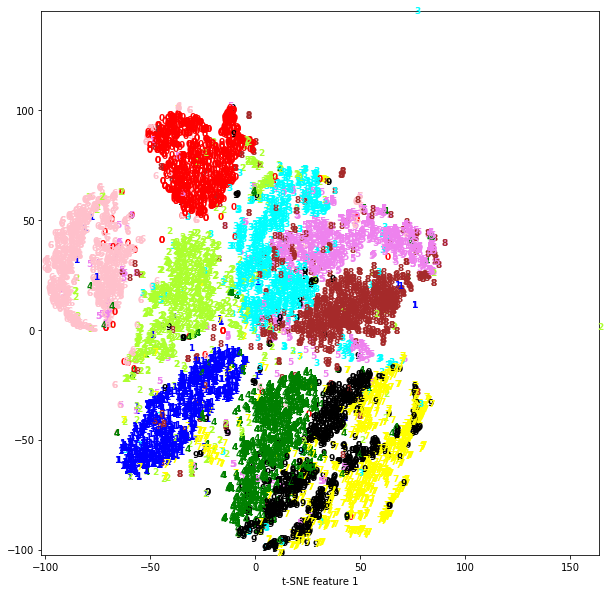

In [2]:
colors = ["red","blue","greenyellow","cyan","green",
          "violet", "pink","yellow","brown","black"]
tsne = TSNE(random_state=0,verbose=2,n_iter=2000,learning_rate=300.0)
mnist_tsne = tsne.fit_transform(X_std)
plt.figure(figsize=(10,10))
plt.xlim(mnist_tsne[:,0].min(),mnist_tsne[:,0].max() + 1)
plt.ylim(mnist_tsne[:,1].min(),mnist_tsne[:,1].max() + 1)
for i in range(len(X_std)):
    plt.text(mnist_tsne[i,0],mnist_tsne[i,1],str(y[i]),
            color=colors[int(y[i])],
            fontdict={"weight":"bold","size":9})
plt.xlabel("t-SNE feature 0")
plt.xlabel("t-SNE feature 1")

In [3]:
X_train,X_test,y_train,y_test = train_test_split(mnist_tsne,y,test_size=0.2)
print(X_train)

[[  2.3324518  12.274545 ]
 [ 62.61245    10.292735 ]
 [  9.055453  -84.87966  ]
 ...
 [-31.068506   77.22473  ]
 [-23.582659  -16.865353 ]
 [ 40.210587   10.251855 ]]


In [4]:
print(X_train.shape)

(8000, 2)


In [5]:
#parameters = [
#    {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
#    {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.001, 0.0001]},
#    {'C': [1, 10, 100, 1000], 'kernel': ['poly'], 'degree': [2, 3, 4], 'gamma': [0.001, 0.0001]},
#    {'C': [1, 10, 100, 1000], 'kernel': ['sigmoid'], 'gamma': [0.001, 0.0001]}
#    ]
clf = svm.SVC(C=1000,kernel="rbf",gamma = 1)


#clf = GridSearchCV(clf, parameters, verbose=2,n_jobs=-1)
clf.fit(X_train,y_train)
test_score = clf.score(X_test,y_test)
y_pred = clf.predict(X_test)
print(test_score)
print(metrics.classification_report(y_test, y_pred, 
                                    target_names=["0","1","2","3","4","5","6","7","8","9"]))
print(metrics.confusion_matrix(y_test, y_pred, labels=range(10)))

0.881
             precision    recall  f1-score   support

          0       0.95      0.93      0.94       189
          1       0.95      0.96      0.95       230
          2       0.74      0.91      0.81       204
          3       0.89      0.87      0.88       211
          4       0.90      0.91      0.91       172
          5       0.88      0.82      0.85       191
          6       0.89      0.91      0.90       194
          7       0.89      0.87      0.88       221
          8       0.88      0.78      0.83       185
          9       0.87      0.85      0.86       203

avg / total       0.88      0.88      0.88      2000

[[175   0   6   0   0   1   7   0   0   0]
 [  0 220   3   1   0   0   3   2   0   1]
 [  1   3 185   2   1   0   2   4   4   2]
 [  1   1  16 184   0   2   0   2   3   2]
 [  0   3   2   1 157   0   2   2   1   4]
 [  0   0   8   7   1 156   6   1  10   2]
 [  4   1   9   0   0   4 176   0   0   0]
 [  0   1   7   2   4   0   0 192   1  14]
 [  2   2  

In [6]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(clf,mnist_tsne,y,verbose=2,n_jobs=3))

[0.86279209 0.88115246 0.87087087]


[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:   11.7s finished


In [7]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.5):

    # setup marker generator and color map
    colors = ("red","blue","orange","cyan","green",
          "gray", "pink","yellow","brown","black")
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                     label=cl)

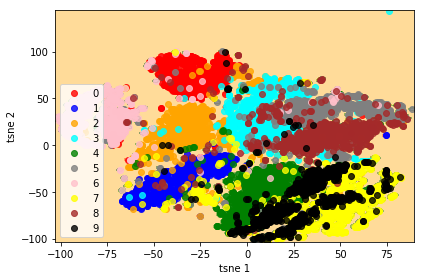

In [8]:
plot_decision_regions(X_train, y_train, classifier=clf)
plt.xlabel('tsne 1')
plt.ylabel('tsne 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()